## Milestone 2 Example Solution: Feature engineering to prepare audio data for deep learning

_Plot the spectrum of an entire example clip from the speech command dataset. Let the x-axis show the frequency in Hz._

In [142]:
import numpy

In [143]:
import librosa

In [145]:
import matplotlib.pyplot as plt

In [144]:
example_audio, sample_rate = librosa.load(example_audio_path, sr=None)

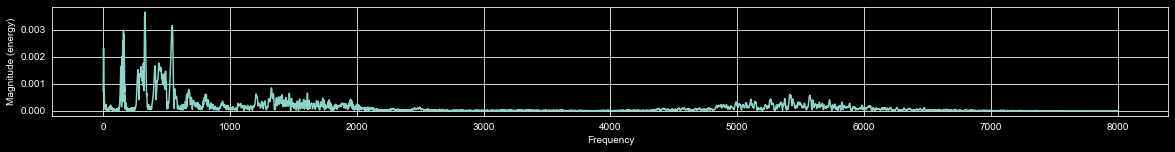

In [146]:
plt.magnitude_spectrum(example_audio, Fs=sample_rate);

_Find existing implementations of the Mel spectrogram, for example in the [`librosa`](https://librosa.org/doc/latest/index.html) and [`python_speech_features`](https://github.com/jameslyons/python_speech_features) libraries. Test, understand and evaluate pros and cons of each implementation._

_Write a convenient function that generates the Mel spectrogram of an audio clip to be used throughout your workflow. You may reuse existing functions from the aforementioned libraries._

In [147]:
def mel_spectrogram(
    audio: numpy.ndarray,
    sample_rate: int,
    threshold: int=None,
):
    melspec = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
    melspec = librosa.power_to_db(melspec, ref=numpy.max)
    if threshold:
        melspec[melspec < threshold] = -80
    return melspec

In [156]:
def show_spectrogram(
    spectrogram: numpy.ndarray,
    sample_rate: int,
    label: str=""
):
    from librosa.display import specshow
    plt.figure(figsize=(20,3))
    specshow(
        spectrogram,
        x_axis='time',
        y_axis='mel',
        sr=sample_rate,
        fmax=8000
    )
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel-frequency spectrogram: {label}')
    plt.show()


In [157]:
Audio(example_audio_path)

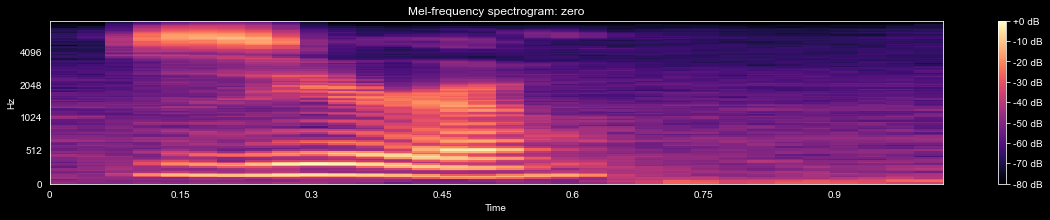

In [158]:

show_spectrogram(
    mel_spectrogram(example_audio, sample_rate),
    sample_rate,
    label="zero"
)

In [160]:
train_data["label"].unique()

array(['bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'four', 'go',
       'happy', 'house', 'left', 'marvin', 'nine', 'no', 'off', 'on',
       'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree',
       'two', 'up', 'wow', 'yes', 'zero'], dtype=object)

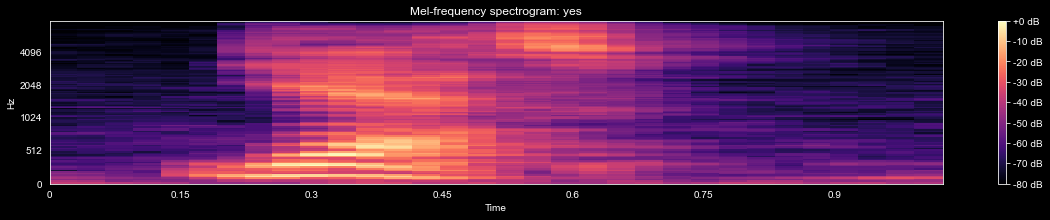

In [176]:
word = "yes"
file_path =  train_data[train_data["label"] == word].sample(n=1)["file_path"].iloc[0]
audio, sample_rate = librosa.load(f"{train_audio_path}/{file_path}", sr=None)
show_spectrogram(
    mel_spectrogram(
        audio,
        sample_rate
    ),
    sample_rate,
    label=word
)

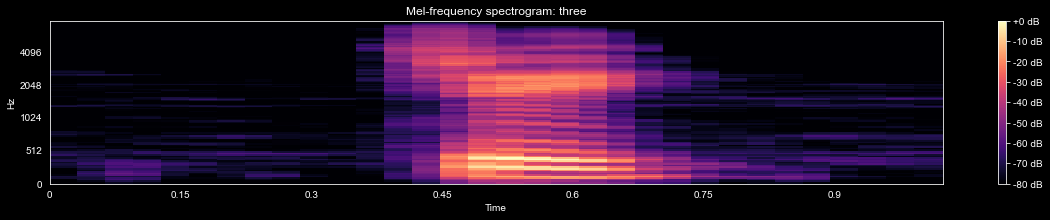

In [179]:
word = "three"
file_path =  train_data[train_data["label"] == word].sample(n=1)["file_path"].iloc[0]
audio, sample_rate = librosa.load(f"{train_audio_path}/{file_path}", sr=None)
show_spectrogram(
    mel_spectrogram(
        audio,
        sample_rate
    ),
    sample_rate,
    label=word
)

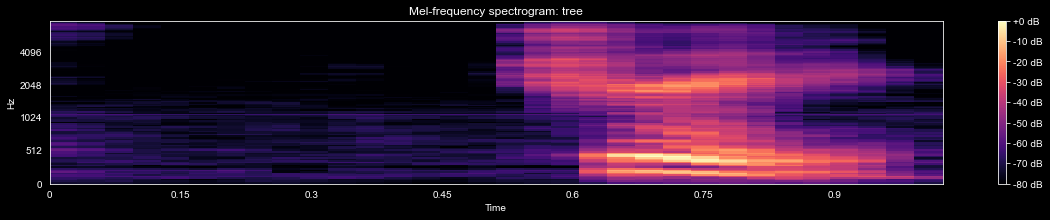

In [182]:
word = "tree"
file_path =  train_data[train_data["label"] == word].sample(n=1)["file_path"].iloc[0]
audio, sample_rate = librosa.load(f"{train_audio_path}/{file_path}", sr=None)
show_spectrogram(
    mel_spectrogram(
        audio,
        sample_rate
    ),
    sample_rate,
    label=word
)

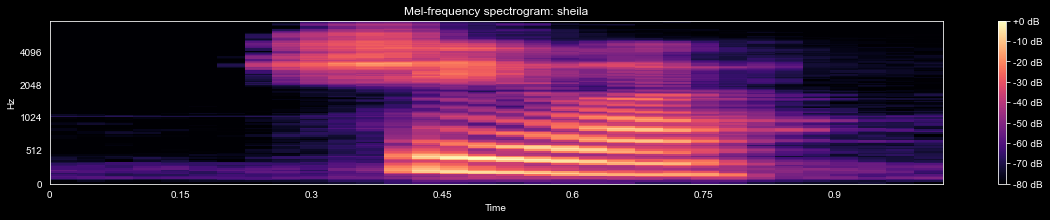

In [183]:
word = "sheila"
file_path =  train_data[train_data["label"] == word].sample(n=1)["file_path"].iloc[0]
audio, sample_rate = librosa.load(f"{train_audio_path}/{file_path}", sr=None)
show_spectrogram(
    mel_spectrogram(
        audio,
        sample_rate
    ),
    sample_rate,
    label=word
)

_Test the scalability of your featurization function: Can it be applied to thousands of audio clips from the speech data set within an acceptable waiting time? Document a few time measurements and the hardware used._

In [188]:
def featurize_clip(file_path):
    audio, sample_rate = librosa.load(f"{train_audio_path}/{file_path}", sr=None)
    spectrogram = mel_spectrogram(audio, sample_rate)
    return spectrogram

In [193]:
%%time
train_data["spectrogram"] = train_data["file_path"].apply(featurize_clip)

CPU times: user 5min 13s, sys: 8.22 s, total: 5min 21s
Wall time: 1min 23s


Time measurement: 1min 23s on a 4-core Intel i7